In [1]:
%load_ext autoreload
%autoreload 2

In [59]:
import sys
sys.path.insert(1, '../')

import experiment
import pickle
from utils import *
from Architectures import *
import random, os
suppress_warnings()
EPOCHS = 256


def countp(model, params):
    tmp = model(**params)
    tmp.build(input_shape=(1,15,7))
    return tmp.count_params()


n_params = []

os.environ['PYTHONHASHSEED']=str(0)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.0f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])


filename = '../data/data100k_raw_combined_atlas_cut.pkl'
n_experiments = 8
SUFFIX = 'latent28'


#TESTING ######
# EPOCHS = 2
# filename = '../data/data50k_raw_combined_atlas_cut_small.pkl'
# n_experiments = 2
# SUFFIX = 'latent28'
###########

In [3]:
import seaborn as sns
import os

#to get latex to work 
os.environ['PATH'] = "%s:/usr/local/cuda-11.2/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/anaconda/bin:/home/delon/texlive/bin/x86_64-linux:/home/delon/.local/bin:/home/delon/bin"%os.environ['PATH']


PIl64 = experiment.Experimenter(filename)
PIl64.fromSaved()

PI = experiment.Experimenter(filename)
PI.fromSaved(suffix=SUFFIX)

Initializing Experimenter
	Loading Data from ../data/data100k_raw_combined_atlas_cut.pkl
	Data Loaded
	Creating Splits
	Splits Created
Done initalizing
Loading Experimenter from Saved Experimenter at /data/delon/experimenter/data100k_raw_combined_atlas_cut
Experimenter Loaded
Getting split
Split Stored
Loading models
{'tripletwise_5_(64, 128, 256, 128, 64)_64': 'models/data100k_raw_combined_atlas_cut_tripletwise_5_(64, 128, 256, 128, 64)_64', 'pairwise_5_(64, 128, 256, 128, 64)_64': 'models/data100k_raw_combined_atlas_cut_pairwise_5_(64, 128, 256, 128, 64)_64', 'particlewise_128_4_64': 'models/data100k_raw_combined_atlas_cut_particlewise_128_4_64', 'pairwise_nl_5_(64, 128, 256, 128, 64)_32_64': 'models/data100k_raw_combined_atlas_cut_pairwise_nl_5_(64, 128, 256, 128, 64)_32_64', 'pairwise_nl_iter_5_((64, 64, 116, 64, 64), (64, 64, 116, 64, 64), (64, 64, 116, 64, 64))_32_64': 'models/data100k_raw_combined_atlas_cut_pairwise_nl_iter_5_((64, 64, 116, 64, 64), (64, 64, 116, 64, 64), (64, 6

2022-06-03 14:02:24.617817: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-03 14:02:24.617868: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-03 14:02:24.617910: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (top1.hep.utexas.edu): /proc/driver/nvidia/version does not exist
2022-06-03 14:02:24.618343: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
latent64 = PIl64.models['%s_%s'%('pairwise', PIl64.get_tail_string(model_params_dict['pairwise']))]
latent2 = PI.models['latent_two_5_(64, 128, 256, 128, 2)_64']
latent8 = PI.models['latent_eight_5_(64, 128, 256, 128, 8)_64']

In [5]:
X_test_latent, y_test_latent = PI.get_test_dataset('latent_two')
X_test, y_test = PIl64.get_test_dataset('pairwise')
X_test_ATLAS, y_test_ATLAS = gen_dataset_high_level(PIl64.events_test, PIl64.events_oup_test, PIl64.events_tag_test)

In [6]:
n_cut = int(len(X_test)*0.1)
assert(len(X_test) == len(X_test_latent))

indices = np.random.permutation(len(X_test))
cut = np.s_[indices[:n_cut]]

latent_label = y_test.numpy()[cut]
latent_label_28 = y_test_latent.numpy()[cut]

In [7]:
latent64_embedded = compute_tsne(latent64, X_test=X_test, cut=cut)
ATLAS_embedded = compute_tsne_embedded(np.array(X_test_ATLAS)[cut])
latent2_embedded = compute_tsne(latent2, cut=cut, X_test=X_test_latent)
latent8_embedded = compute_tsne(latent8, cut=cut, X_test=X_test_latent)

computing tsne
--------------------------------------------------------------------------------
TSNE(n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=500.00 for 250 iterations...
Iteration   50, KL divergence 2.1286, 50 iterations in 2.3778 sec
Iteration  100, KL divergence 2.1272, 50 iterations in 2.0800 sec
Iteration  150, KL divergence 2.1246, 50 iterations in 2.1037 sec
Iteration  200, KL divergence 2.1268, 50 iterations in 2.0168 sec
Iteration  250, KL divergence 2.1265, 50 iterations in 1.9693 sec
   --> Time elapsed: 10.55 seconds
===> Running optimization with exaggeration=1.00, lr=500.00 for 500 iterations...
Iteration   50, KL divergence 1.3768, 50 iterations in 2.1916 sec
Iteration  100, KL divergence 1.2558, 50 iterations in 2.1768 sec
Iteration  150, KL divergence 1.2165, 50 iterations in 2.1597 sec
Iteration  200, KL divergence 1.2007, 50 iterations in 2.0820 sec

2022-06-03 14:03:08.036650: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-03 14:03:08.037400: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2397305000 Hz


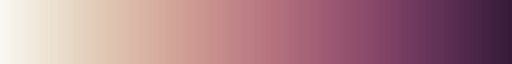

In [118]:
sns.cubehelix_palette(start=2/10, light=.97, as_cmap=True)

[2.27373675e-16 5.63697237e-16] [16.50196956 11.96955512]
KL div 1.7550605329696563


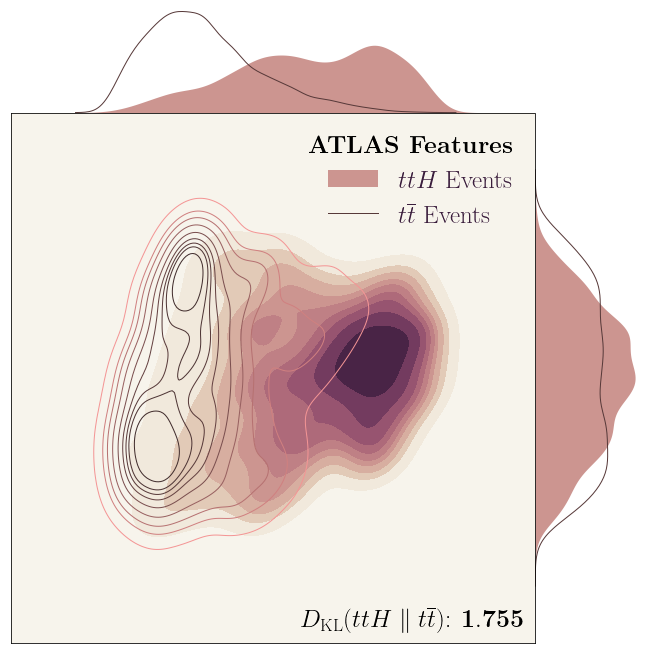

In [159]:
axATLAS = gen_tsne(ATLAS_embedded, latent_label, text=r'\textbf{ATLAS Features}',
                   cmap = sns.cubehelix_palette(start=2/10, light=.97, as_cmap=True), col_aux='#f49595')
axATLAS.savefig('figures/ATLAS_tsne.pdf')

[5.11590770e-16 1.13686838e-16] [27.52535668  5.23064074]
KL div 3.9241769845678935


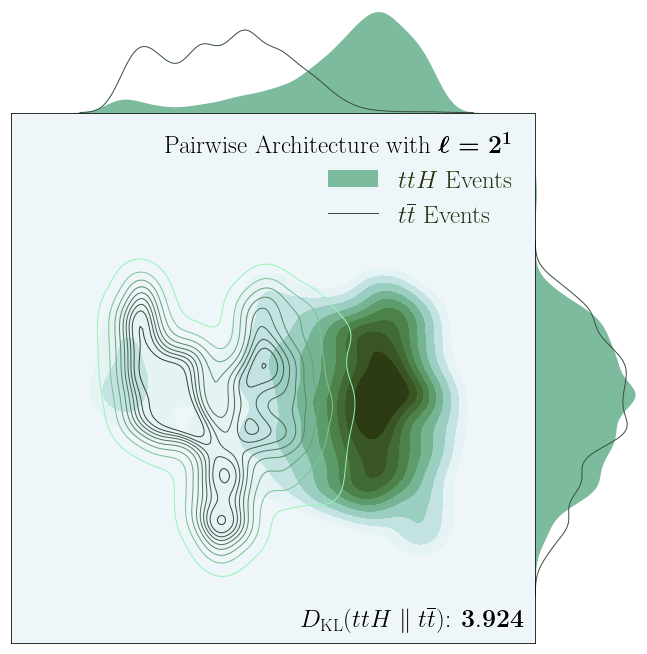

In [160]:
ax = gen_tsne(latent2_embedded, latent_label_28, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^1}$',
             cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True), col_aux='#95f4b7')
ax.savefig('figures/l2_tsne.pdf')

[-7.55543776e-16 -7.57912251e-17] [16.31142037  7.66338845]
KL div 2.879434413013807


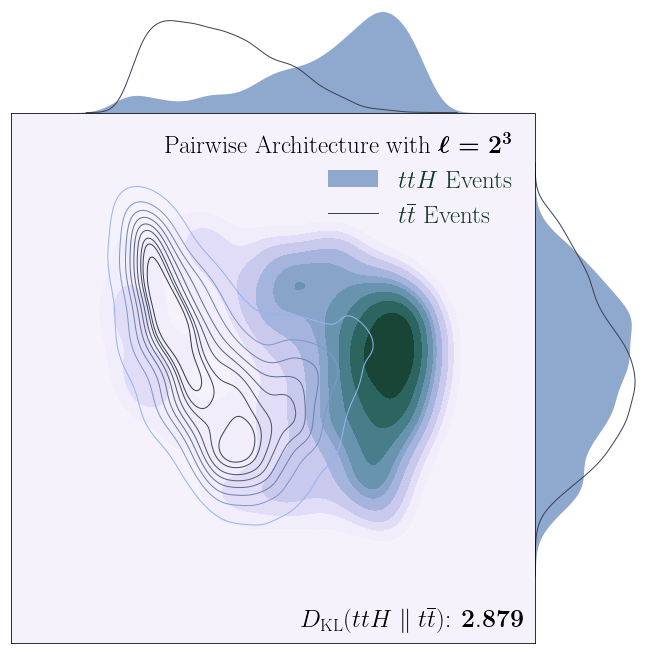

In [161]:
ax = gen_tsne(latent8_embedded, latent_label_28, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^3}$',
              cmap=sns.cubehelix_palette(start=20/10, light=.97, as_cmap=True), col_aux='#95b3f4')
ax.savefig('figures/l8_tsne.pdf')

[-3.88430029e-16  2.08425869e-16] [11.87822633  4.44684422]
KL div 2.830537595862983


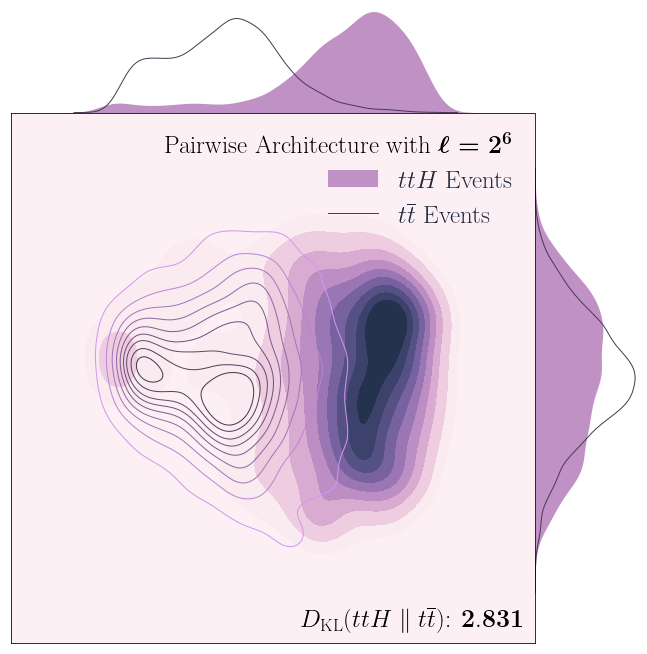

In [162]:
axl64 = gen_tsne(latent64_embedded, latent_label, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^6}$ ',
                )
axl64.savefig('figures/l64_tsne.pdf')

[-1.9720063 17.319551 ] [ 2.0891335 18.270456 ]
KL div 2.59354913324414


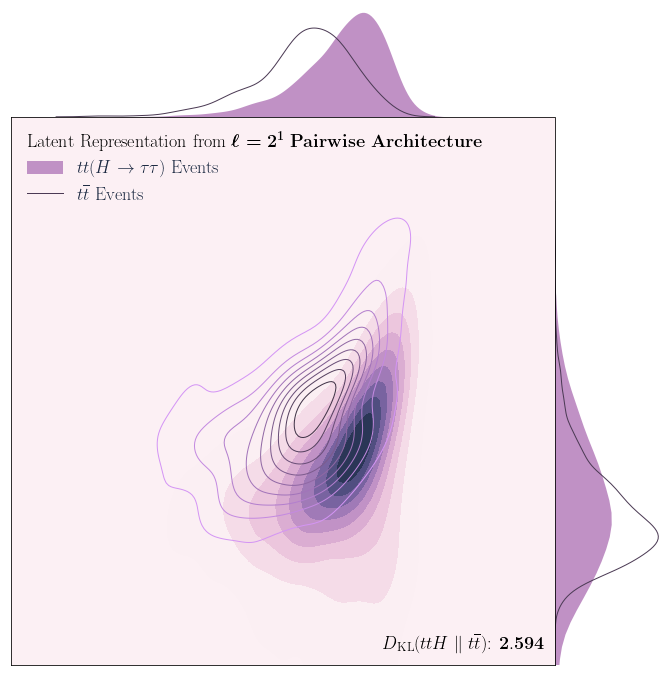

In [78]:
l2_yhat = LatentGetter(latent2.layers[0:3], condensed=True).predict(X_test_latent.numpy()[cut])
no_tsne= gen_tsne(l2_yhat, y_test_latent.numpy()[cut], text=r'Latent Representation from \boldmath$\mathbf{\ell=2^1}$ \textbf{Pairwise Architecture}',
         rotated=True, log=2, bnds=True)

In [89]:
l64_yhat = LatentGetter(latent64.layers[0:3], condensed=True).predict(X_test.numpy()[cut])
print(kldiv(l64_yhat, y_test.numpy()[cut]))

10.802043554829615


In [88]:
l8_yhat = LatentGetter(latent8.layers[0:3], condensed=True).predict(X_test_latent.numpy()[cut])
print(kldiv(l8_yhat, y_test_latent.numpy()[cut]))

3.690704587186695


In [87]:
l2_yhat = LatentGetter(latent2.layers[0:3], condensed=True).predict(X_test_latent.numpy()[cut])
print(kldiv(l2_yhat, y_test_latent.numpy()[cut]))

2.593551595534098


In [83]:
print(kldiv(np.array(X_test_ATLAS), y_test_ATLAS)/np.sqrt(8))

1.1555291414344877
